<a href="https://colab.research.google.com/github/sujitkumar205/Climate-Informed-Finance-Unveiling-Stock-Price-Predictability-with-Alternative-Data/blob/main/Climate_vs_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing and Importing Required Modules

In [ ]:
!pip install featurewiz
!pip install delayed

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import os
import matplotlib as mpl
import seaborn as sns
import delayed
from featurewiz import featurewiz
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets, linear_model, metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import xgboost as xg
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from tabulate import tabulate

# Reading the Dataset

In [ ]:
df = pd.read_csv('/content/weather_and_stock_ADM.csv', index_col='date')

# Handling Null Values

In [ ]:
def nulls_breakdown(df=df):
    df_cols = list(df.columns)
    cols_total_count = len(list(df.columns))
    cols_count = 0
    for loc, col in enumerate(df_cols):
        null_count = df[col].isnull().sum()
        total_count = df[col].isnull().count()
        percent_null = round(null_count/total_count*100, 2)
        if null_count > 0:
            cols_count += 1
            print('[iloc = {}] {} has {} null values: {}% null'.format(loc, col, null_count, percent_null))
    cols_percent_null = round(cols_count/cols_total_count*100, 2)
    print('Out of {} total columns, {} contain null values; {}% columns contain null values.'.format(cols_total_count, cols_count, cols_percent_null))

In [ ]:
nulls_breakdown()

Out of 71 total columns, 0 contain null values; 0.0% columns contain null values.


# Handling Outliers

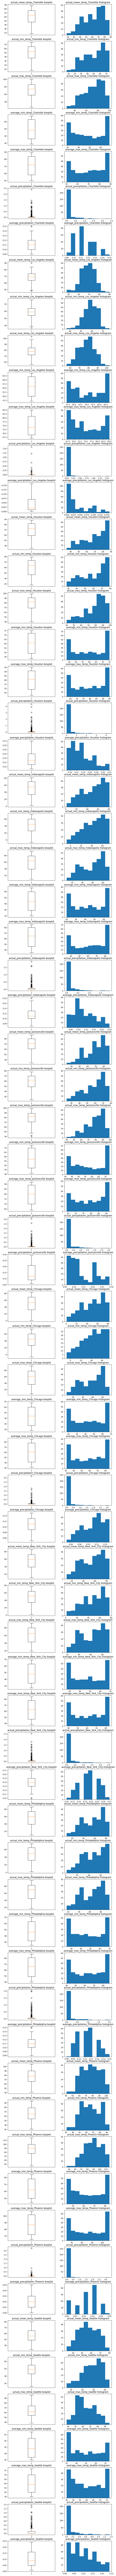

In [ ]:
cont_vars = list(df.columns)[:-1]
def outliers_visual(data):
    plt.figure(figsize=(10, 250))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(70, 2, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(70, 2, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
    plt.show()
outliers_visual(df)

In [ ]:
def outlier_count(col, data=df):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [ ]:
for col in cont_vars:
    outlier_count(col)

---------------actual_mean_temp_Charlotte---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------actual_min_temp_Charlotte---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------actual_max_temp_Charlotte---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------average_min_temp_Charlotte---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------average_max_temp_Charlotte---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------actual_precipitation_Charlotte---------------
Number of outliers: 55
Percent of data that is outlier: 21.07%
---------------average_precipitation_Charlotte---------------
Number of outliers: 3
Percent of data that is outlier: 1.15%
---------------actual_mean_temp_Los_Angeles---------------
Number of outliers: 2
Percent of data that is outlier: 0.77%
---------------actual_min_temp_Los_Angeles--------

# Visualization of Dataset After Pre-Processing

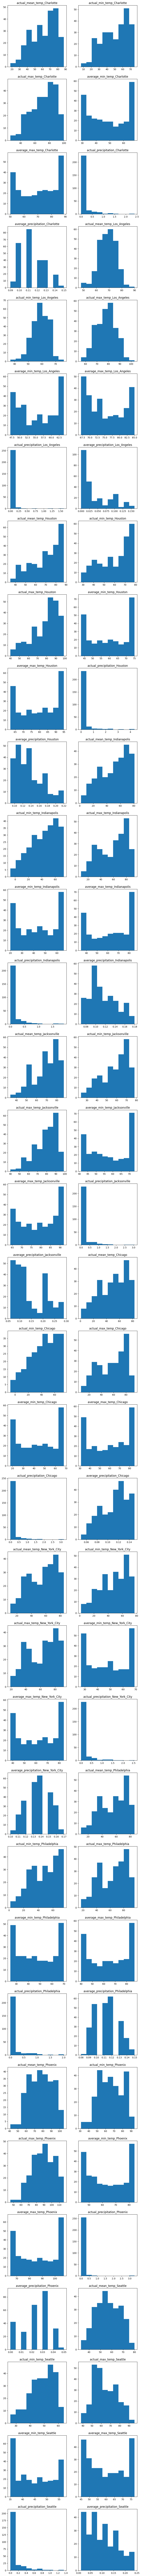

In [ ]:
plt.figure(figsize=(10, 200))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(35, 2, i)
    plt.hist(df[col])
    plt.title(col)

# Heat Map of All Features

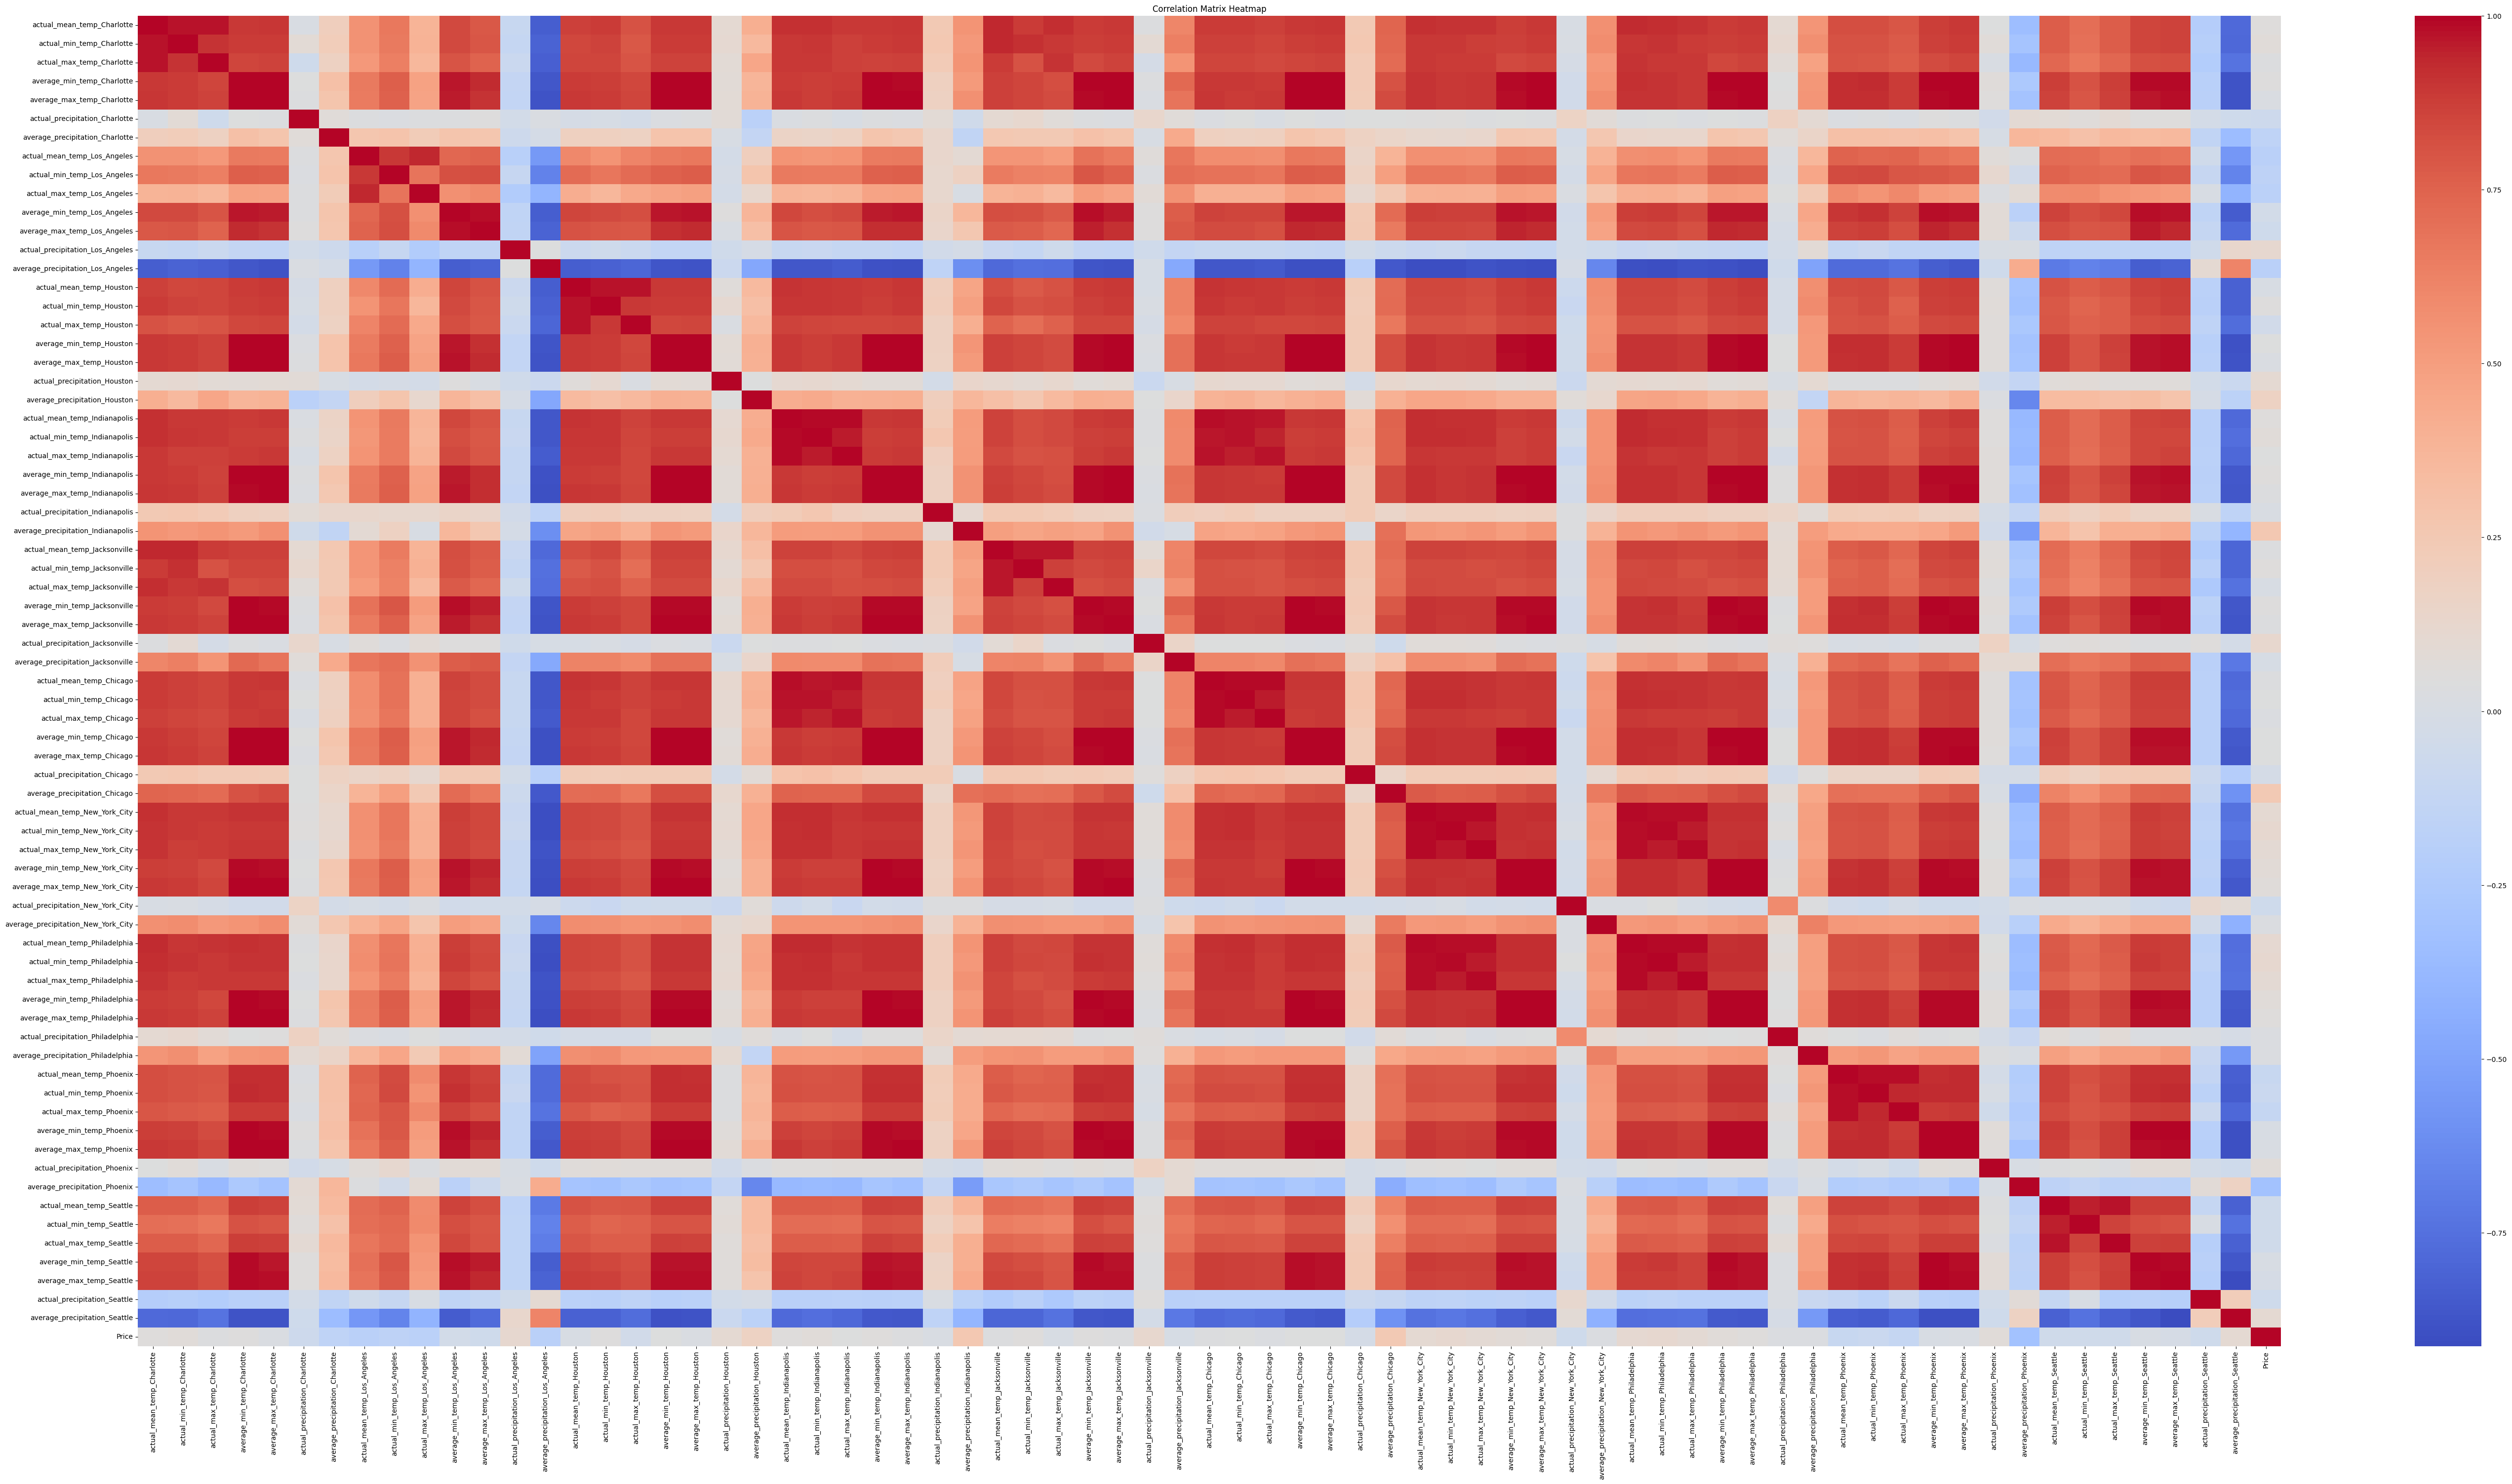

In [ ]:
plt.figure(figsize=(70,35))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Stock Price Trend

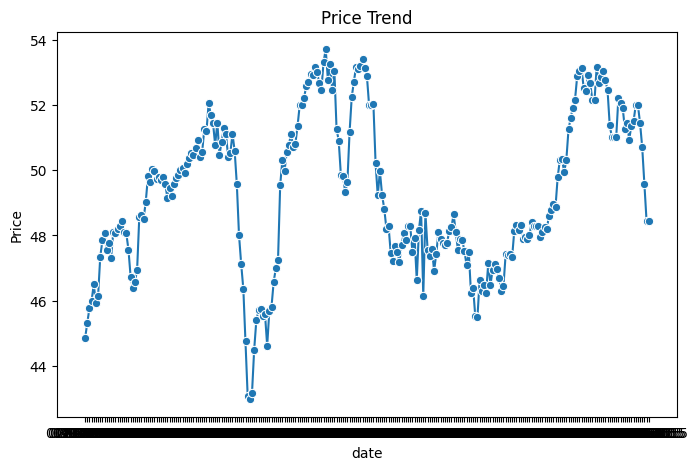

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(x='date', y='Price',  data= df, marker='o')
plt.title('Price Trend')
plt.show()

# Feature Extraction Using FeatureWiz

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Regression problem ####
    Loaded train data. Shape = (261, 71)
#### Single_Label Regression problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
###################################################################

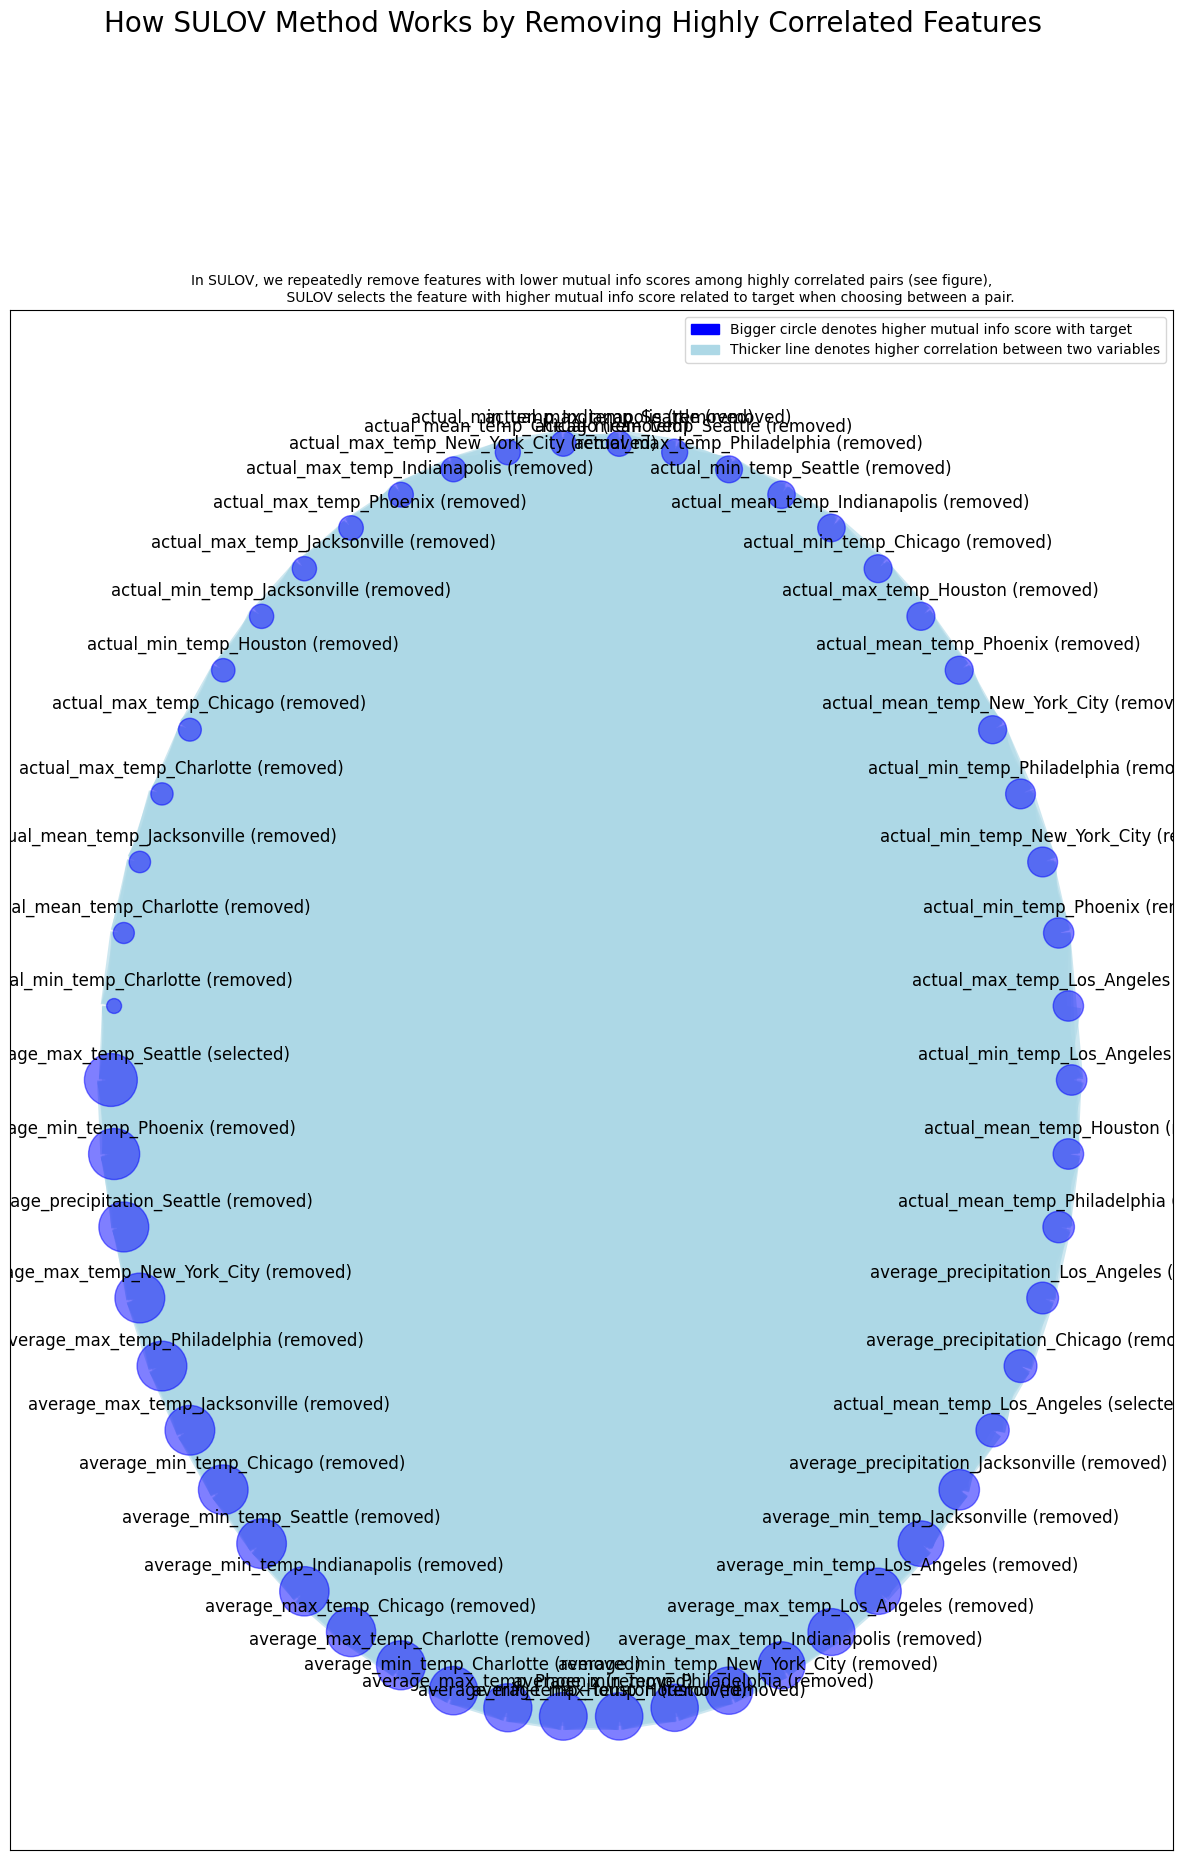

Time taken for SULOV method = 2 seconds
    Adding 0 categorical variables to reduced numeric variables  of 18
Final list of selected 18 vars after SULOV = ['actual_precipitation_Charlotte', 'average_precipitation_Charlotte', 'actual_precipitation_Los_Angeles', 'actual_precipitation_Houston', 'average_precipitation_Houston', 'actual_precipitation_Indianapolis', 'average_precipitation_Indianapolis', 'actual_precipitation_Jacksonville', 'actual_precipitation_Chicago', 'actual_precipitation_New_York_City', 'average_precipitation_New_York_City', 'actual_precipitation_Philadelphia', 'average_precipitation_Philadelphia', 'actual_precipitation_Phoenix', 'average_precipitation_Phoenix', 'actual_precipitation_Seattle', 'average_max_temp_Seattle', 'actual_mean_temp_Los_Angeles']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E

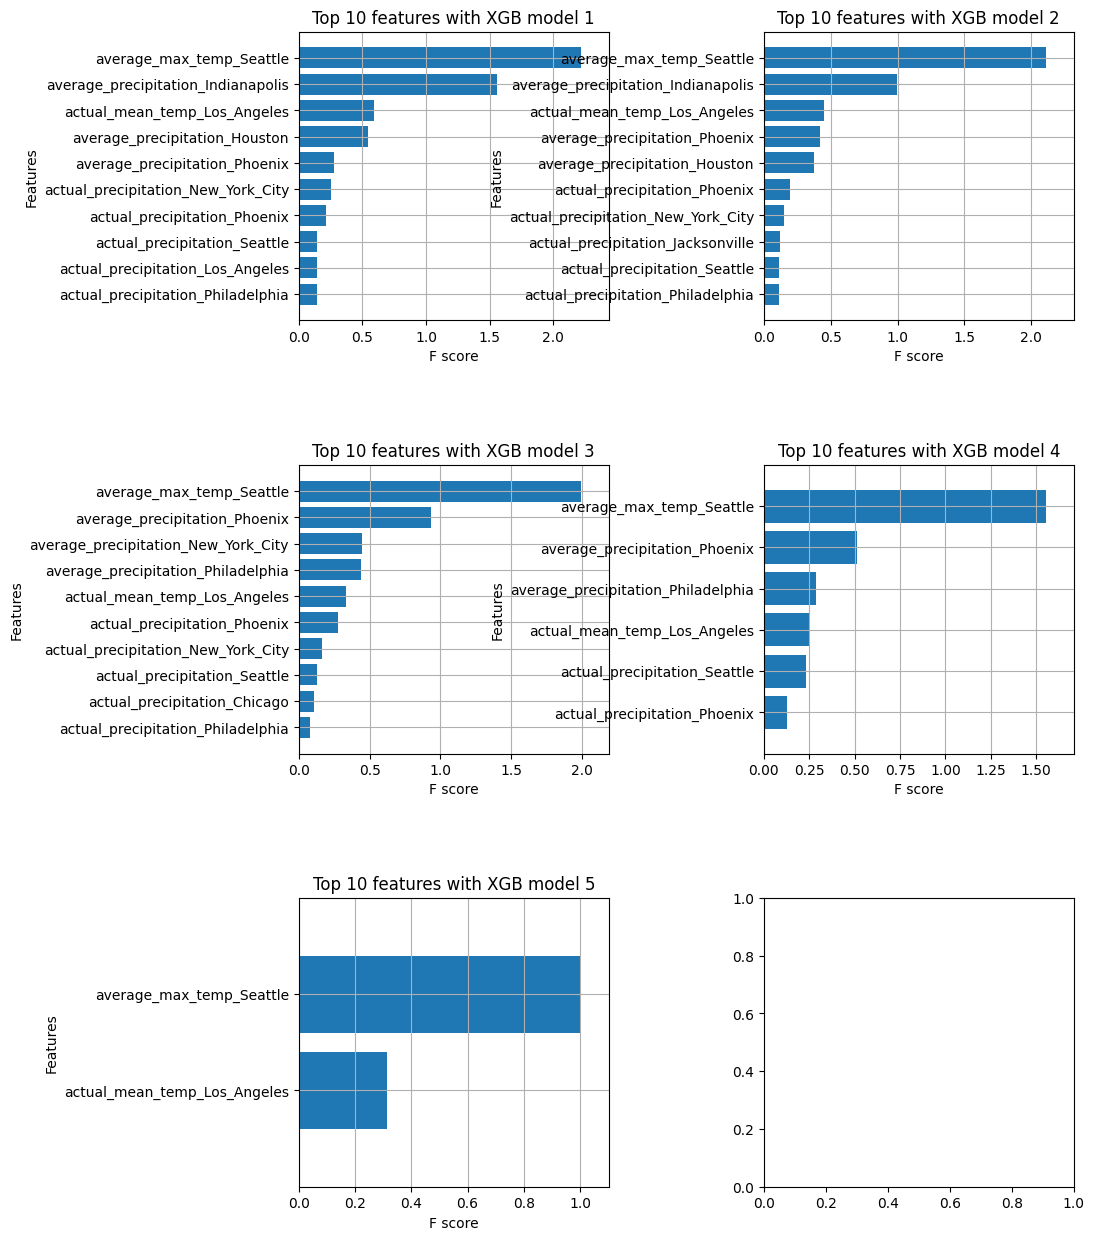

    Completed XGBoost feature selection in 2 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 17 important features:
['average_max_temp_Seattle', 'average_precipitation_Indianapolis', 'actual_mean_temp_Los_Angeles', 'average_precipitation_Houston', 'average_precipitation_Charlotte', 'actual_precipitation_Charlotte', 'actual_precipitation_Seattle', 'average_precipitation_Phoenix', 'actual_precipitation_New_York_City', 'actual_precipitation_Chicago', 'actual_precipitation_Houston', 'actual_precipitation_Philadelphia', 'actual_precipitation_Jacksonville', 'actual_precipitation_Phoenix', 'average_precipitation_New_York_City', 'actual_precipitation_Indianapolis', 'average_precipitation_Philadelphia']
Total Time taken for featurewiz selection = 6 seconds
Output co

In [ ]:
target = ['Price']
features = featurewiz(df, target, corr_limit=0.70,verbose=2)

In [ ]:
features

(['average_max_temp_Seattle',
  'average_precipitation_Indianapolis',
  'actual_mean_temp_Los_Angeles',
  'average_precipitation_Houston',
  'average_precipitation_Charlotte',
  'actual_precipitation_Charlotte',
  'actual_precipitation_Seattle',
  'average_precipitation_Phoenix',
  'actual_precipitation_New_York_City',
  'actual_precipitation_Chicago',
  'actual_precipitation_Houston',
  'actual_precipitation_Philadelphia',
  'actual_precipitation_Jacksonville',
  'actual_precipitation_Phoenix',
  'average_precipitation_New_York_City',
  'actual_precipitation_Indianapolis',
  'average_precipitation_Philadelphia'],
             average_max_temp_Seattle  average_precipitation_Indianapolis  \
 date                                                                       
 01-07-2014                        73                                0.16   
 02-07-2014                        73                                0.16   
 03-07-2014                        74                                0

In [ ]:
X = df[['average_max_temp_Seattle',
  'average_precipitation_Indianapolis',
  'actual_mean_temp_Los_Angeles',
  'average_precipitation_Houston',
  'average_precipitation_Charlotte',
  'actual_precipitation_Charlotte',
  'actual_precipitation_Seattle',
  'average_precipitation_Phoenix',
  'actual_precipitation_New_York_City',
  'actual_precipitation_Chicago',
  'actual_precipitation_Houston',
  'actual_precipitation_Philadelphia',
  'actual_precipitation_Jacksonville',
  'actual_precipitation_Phoenix',
  'average_precipitation_New_York_City',
  'actual_precipitation_Indianapolis',
  'average_precipitation_Philadelphia']]

y = df['Price']

# Normalizing Values

In [ ]:
X=(X-X.min())/(X.max()-X.min())

# Train-Test Spilt

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# printing the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

# printing the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(208, 17)
(53, 17)
(208,)
(53,)


# Defining Function to Train Models and Plot Respective Graphs

In [ ]:
def trainModel(modelName, Acc, Abs, Sqr,featureImp,t):
  modelName.fit(X_train, y_train)
  pred = modelName.predict(X_test)
  accuracy_score =  modelName.score(X_test,y_test)
  print("Accuracy = ",accuracy_score*100)
  Acc.append(accuracy_score*100)
  print("Mean Absolute Error = ", mean_absolute_error(y_test, pred))
  Abs.append(mean_absolute_error(y_test, pred))
  print("Mean Squared Error = ", mean_squared_error(y_test, pred))
  Sqr.append(mean_squared_error(y_test, pred))
  print("\n")

  fig = plt.figure(figsize=(18, 12))
  ax = fig.add_subplot(221)
  ax2 = fig.add_subplot(222)
  ax3 = fig.add_subplot(223)

  ax.set_title("Predicted vs Actual Value")
  ax.scatter(pred, y_test, edgecolors=(0, 0, 1))
  ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Actual')


  ax2.scatter(modelName.predict(X_train), modelName.predict(X_train) - y_train,color = "green", s = 10, label = 'Train data')
  ax2.scatter(modelName.predict(X_test), modelName.predict(X_test) - y_test,color = "blue", s = 10, label = 'Test data')
  ax2.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  ax2.legend(loc = 'upper right')
  ax2.set_title("Residual errors")


  if t==0:
    feat_importances = pd.Series(modelName.feature_importances_, index=X_train.columns)
    #feat_importances.nlargest(25).plot(kind='barh',figsize=(5,5))
    j = 0
    ax3.bar(X_train.columns, feat_importances,color='green', width = 0.4)
    plt.xlabel("Features")
    plt.xticks(rotation=90)
    plt.ylabel("Importance")
    plt.title("Importance of Features")
    for i in feat_importances:
      featureImp[j] = featureImp[j] + i
      j = j+1
  else:
    importance = modelName.coef_
    j = 0
    val = []
    for i,v in enumerate(importance):
      val.append(v)
    ax3.bar(X_train.columns, val ,color='green', width = 0.4)
    plt.xlabel("Features")
    plt.xticks(rotation=90)
    plt.ylabel("Importance")
    plt.title("Importance of Features")
    for i,v in enumerate(importance):
      featureImp[j] = featureImp[j] + v
      j = j+1
      #print(v)
  plt.show()
  print("\n\n")


# Initializing Different Models and Calling Training Function

In [ ]:
Linear_reg = linear_model.LinearRegression()
Random_forest = RandomForestRegressor(n_estimators = 100, random_state = 0)
DT_reg = DecisionTreeRegressor()
e_net = ElasticNet(alpha = 1)
lasso = Lasso(alpha = 1)
ridgeR = Ridge(alpha = 1)
Bayreg = linear_model.BayesianRidge()
xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)

Random Forest Regressor
-----------------------
Accuracy =  77.96584488870094
Mean Absolute Error =  0.8255603773584866
Mean Squared Error =  1.2122237198113124




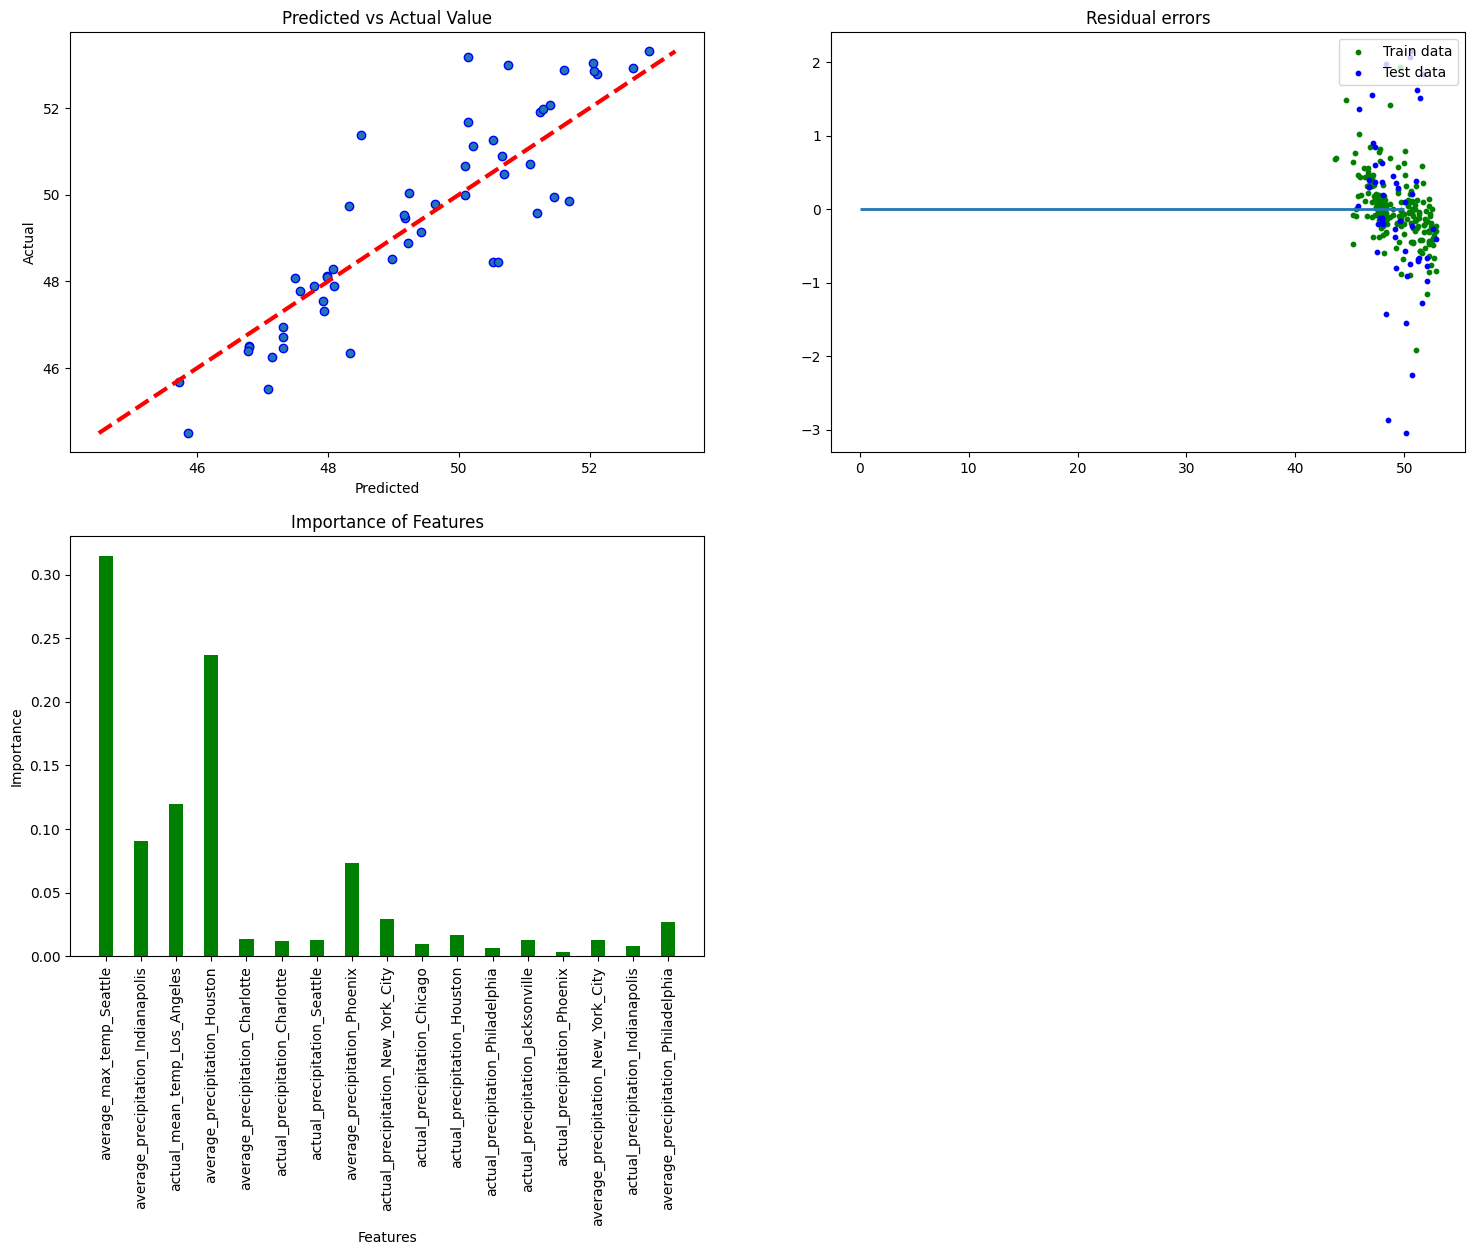




Decision Tree Regressor
-----------------------
Accuracy =  30.18983310918929
Mean Absolute Error =  1.113962264150943
Mean Squared Error =  3.840652830188679




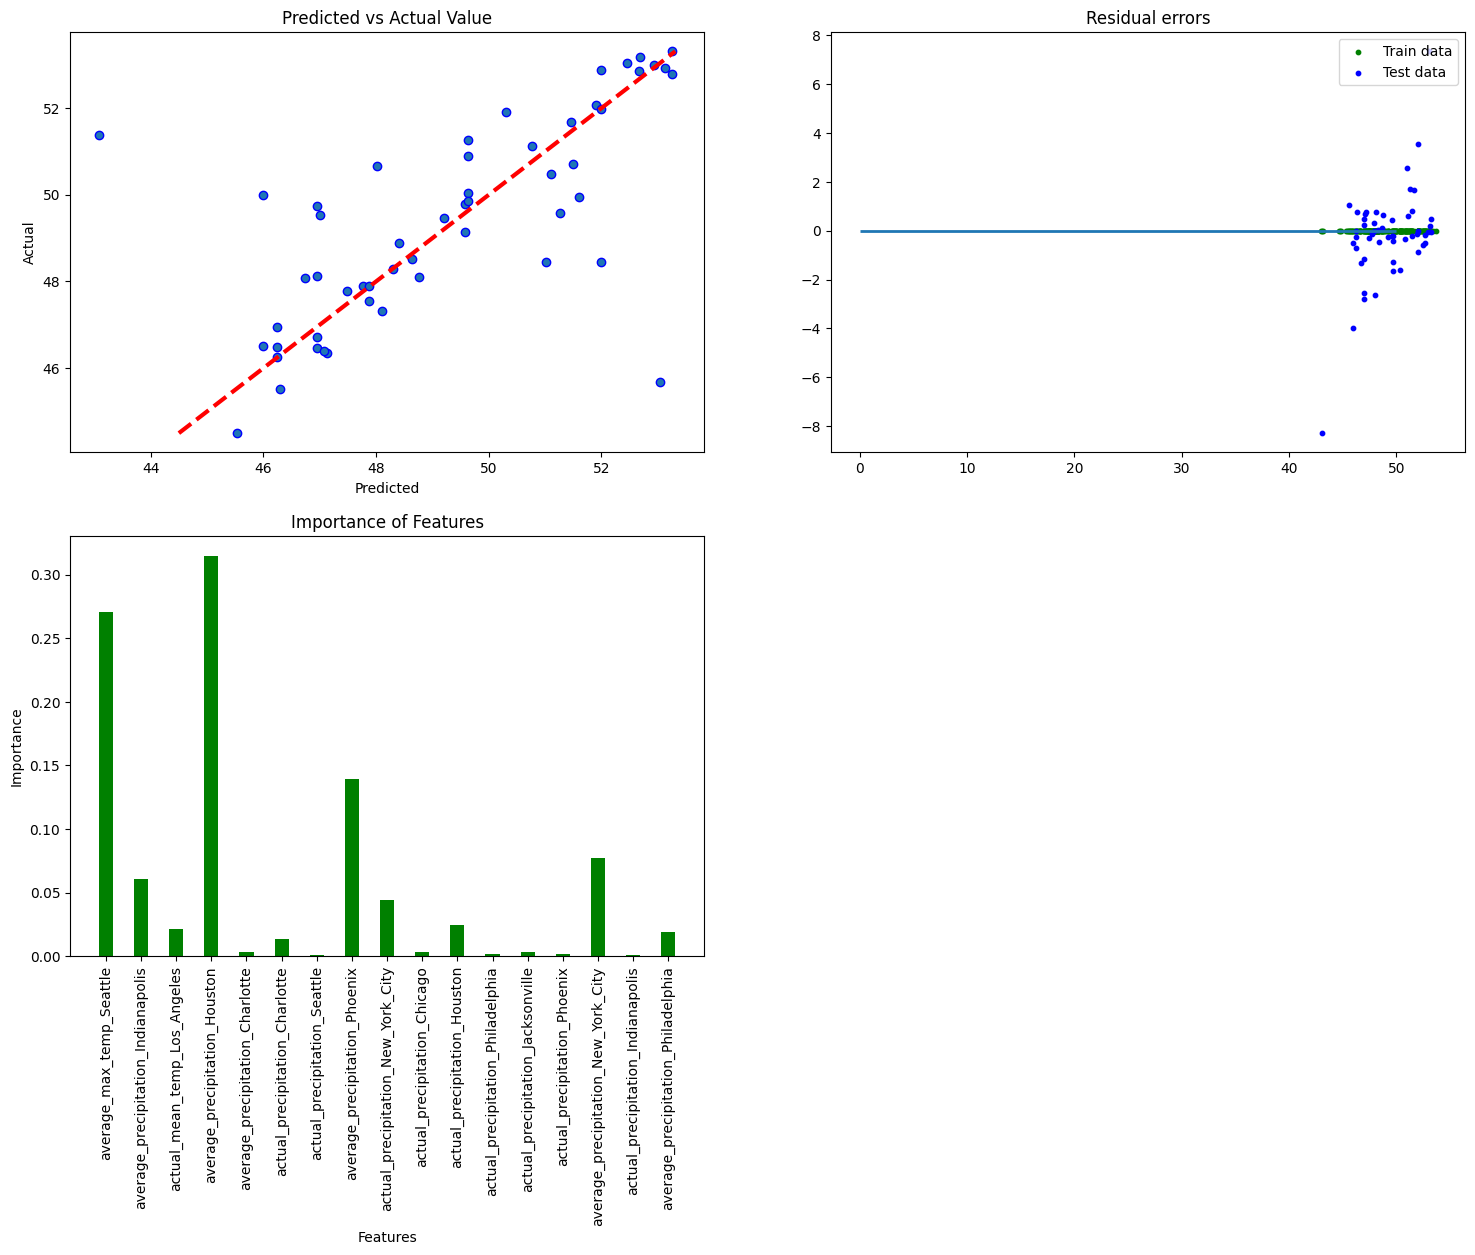




XGB Regressor
-------------
Accuracy =  28.61209984123686
Mean Absolute Error =  1.6095156917931903
Mean Squared Error =  3.9274528768111425




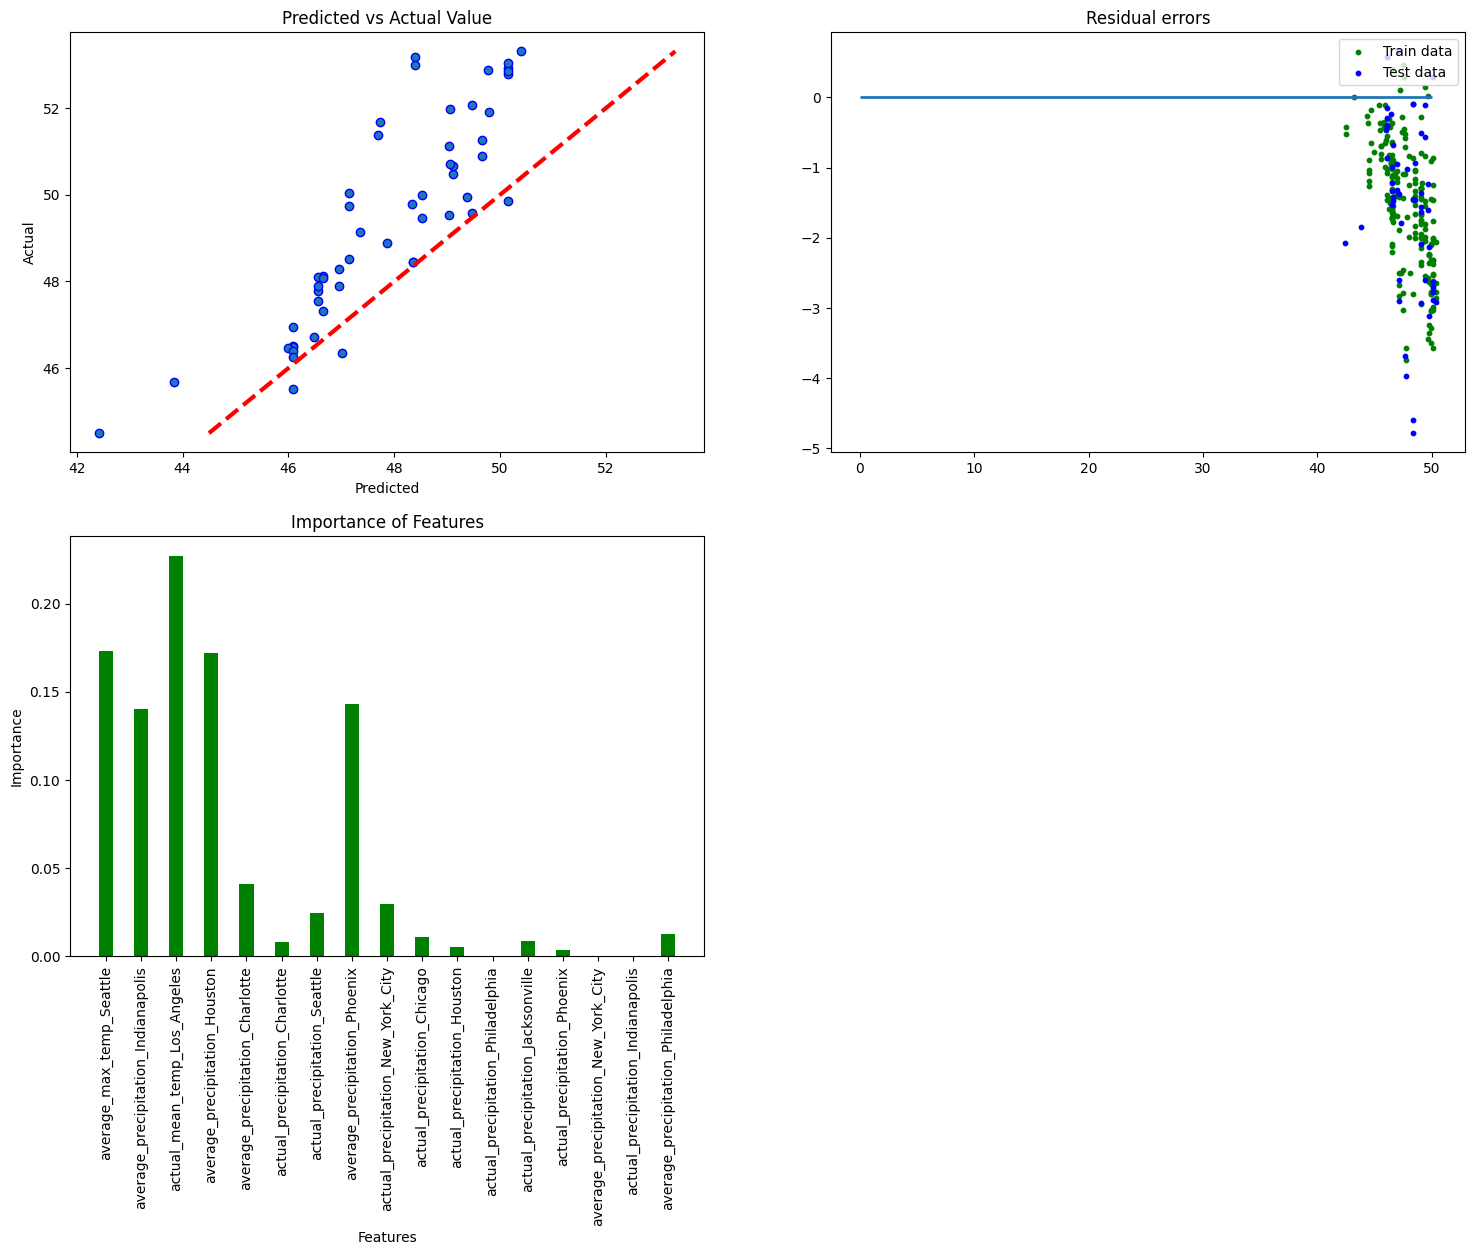




Lnear Regression
----------------
Accuracy =  8.219036829814053
Mean Absolute Error =  1.9279142925580932
Mean Squared Error =  5.049390821660073




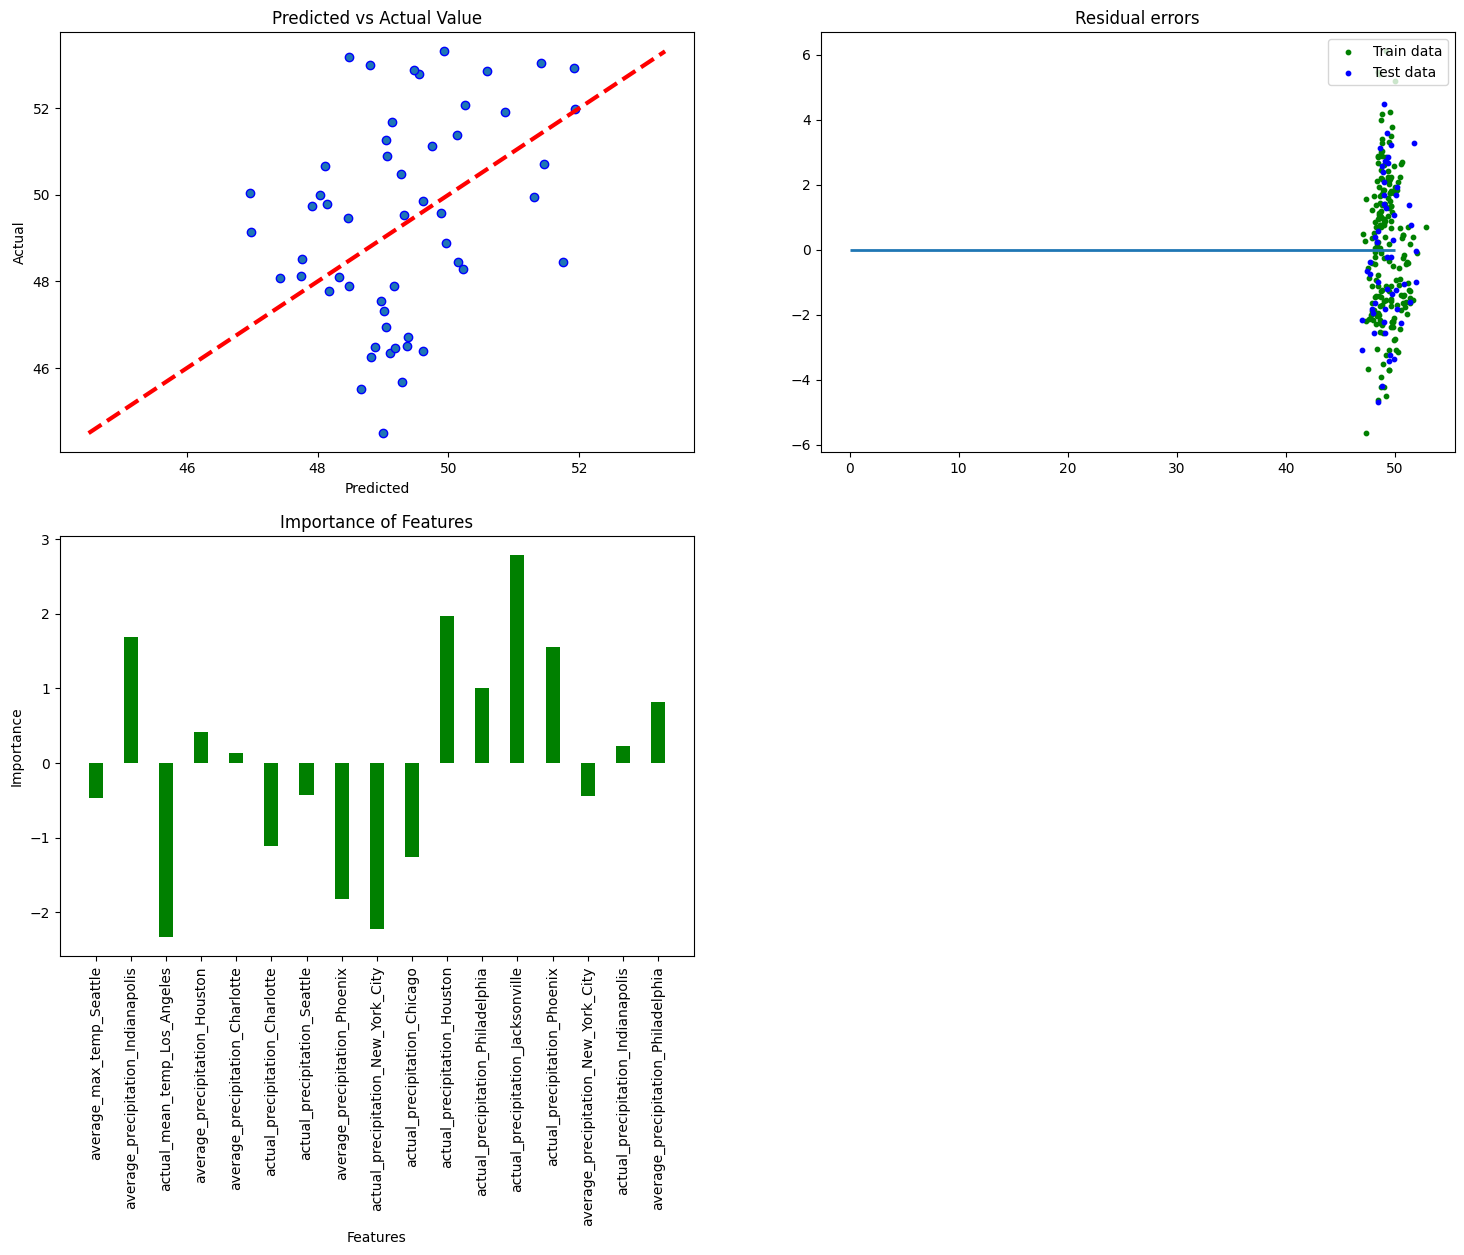




Lasso Regression
----------------
Accuracy =  -0.38978992681535374
Mean Absolute Error =  2.000214985486213
Mean Squared Error =  5.5230111597859946




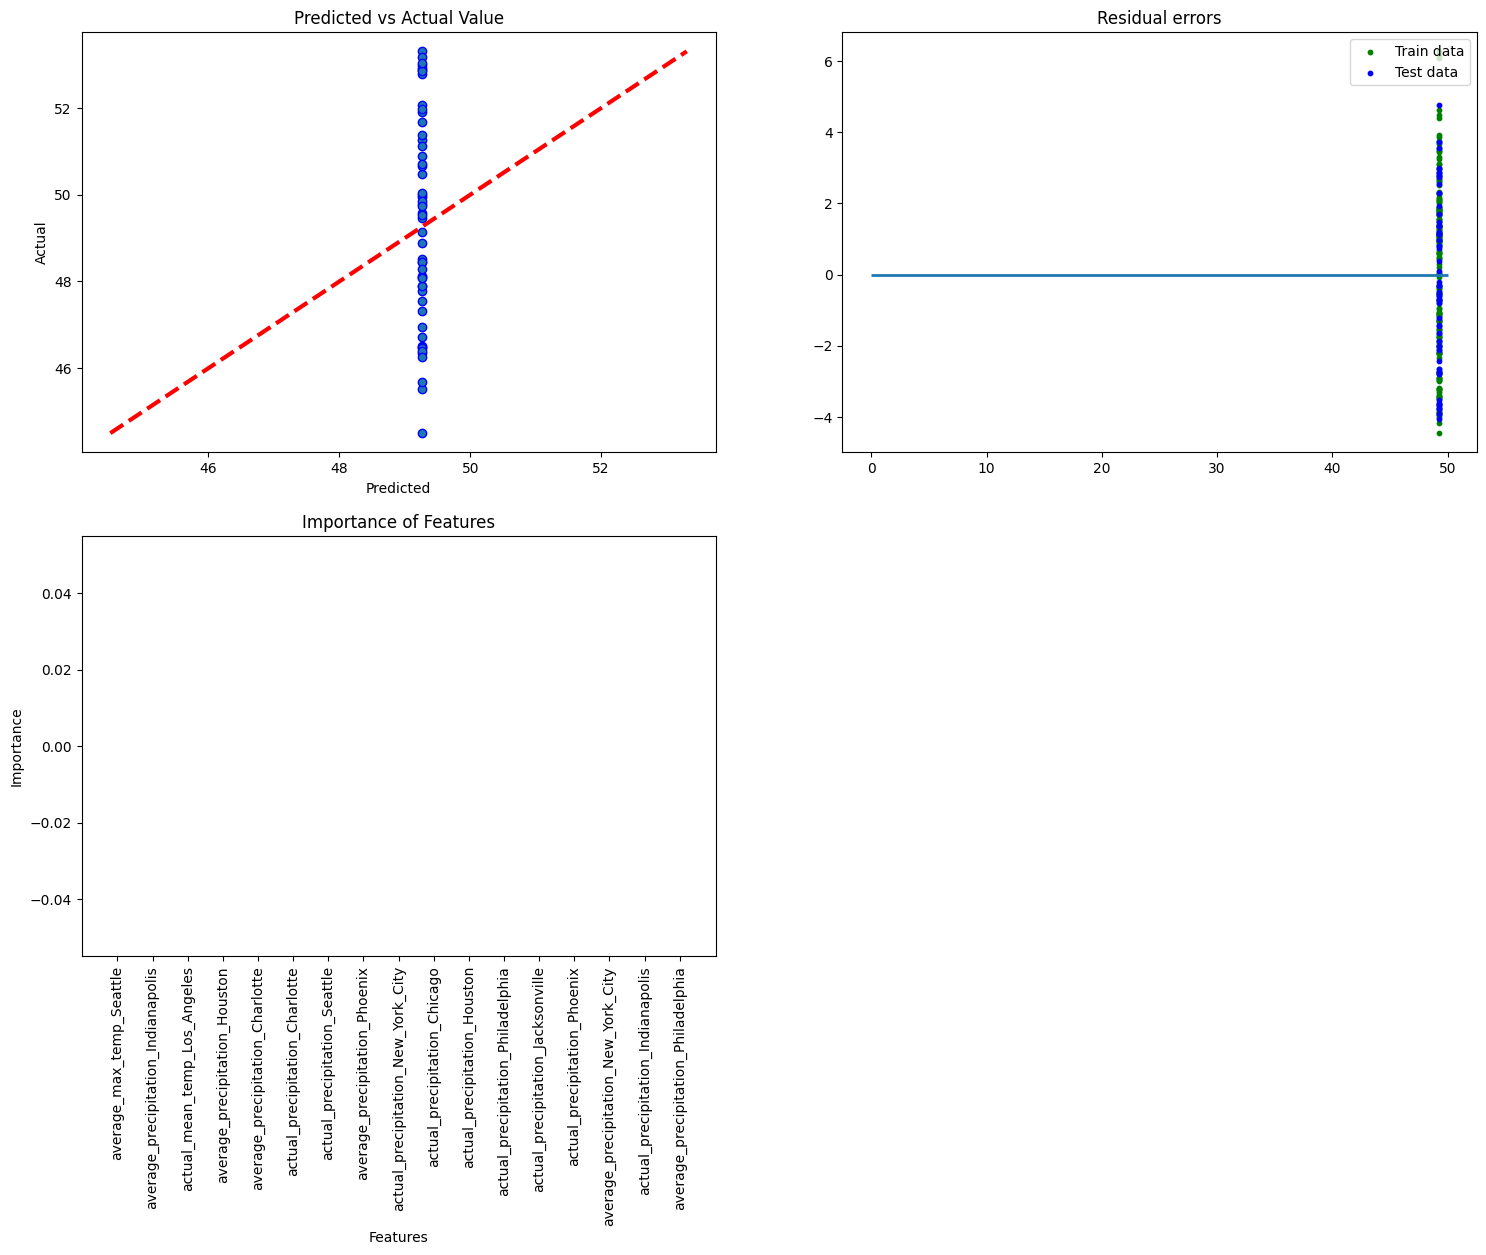




Elastic Net Regressor
---------------------
Accuracy =  -0.38978992681535374
Mean Absolute Error =  2.000214985486213
Mean Squared Error =  5.5230111597859946




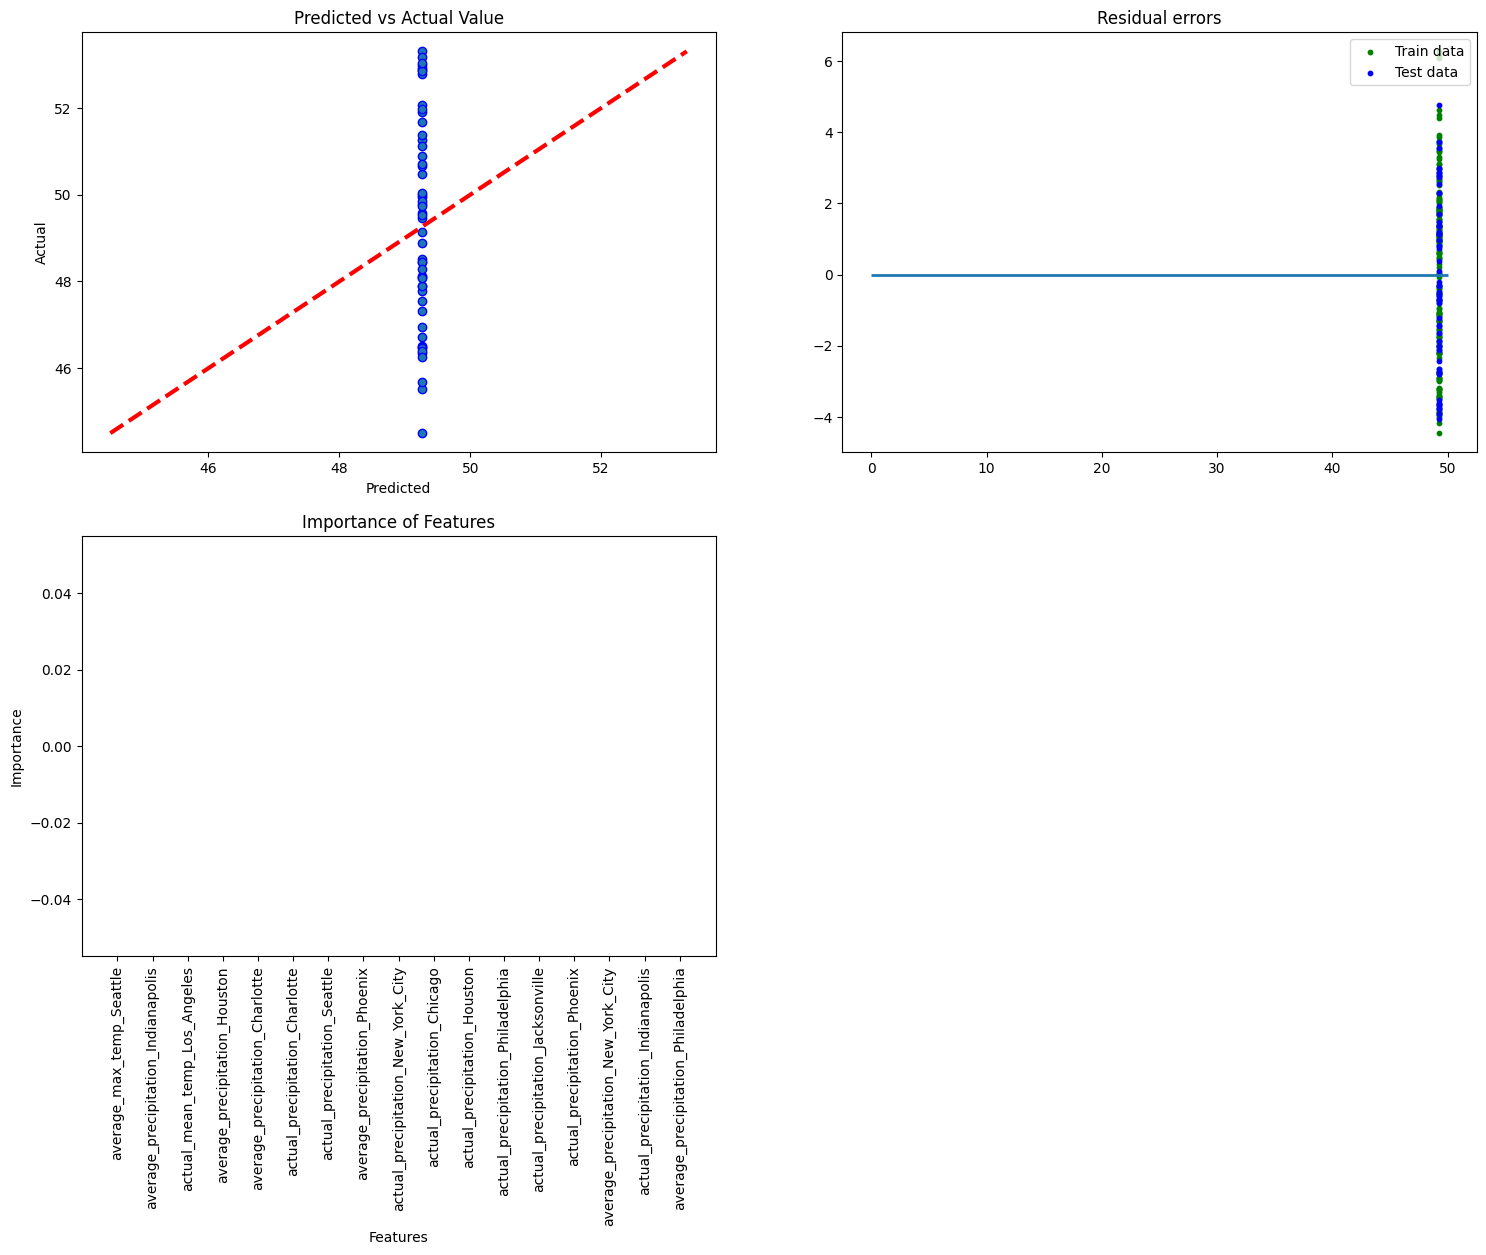




Ridge Regression
----------------
Accuracy =  10.752336544007646
Mean Absolute Error =  1.9144517625301027
Mean Squared Error =  4.910019650520322




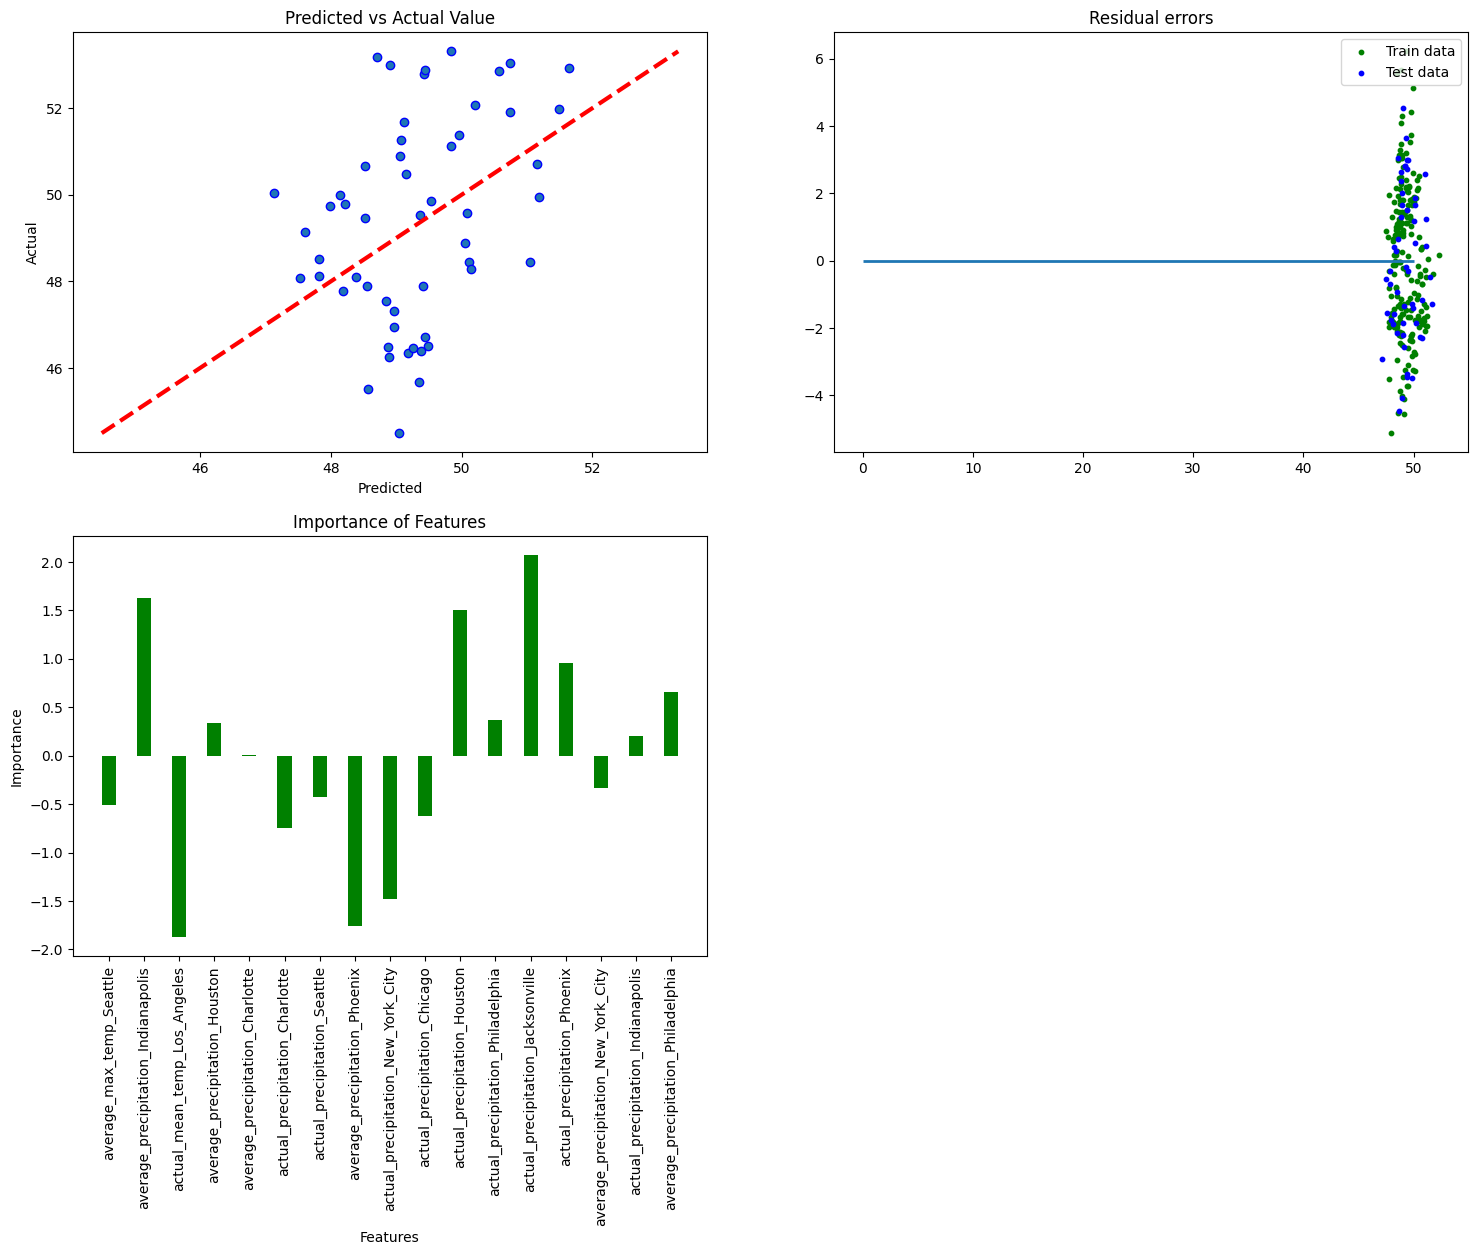




Bayesian Ridge Regression
-------------------------
Accuracy =  12.058083091045969
Mean Absolute Error =  1.8864740889937586
Mean Squared Error =  4.83818313451205




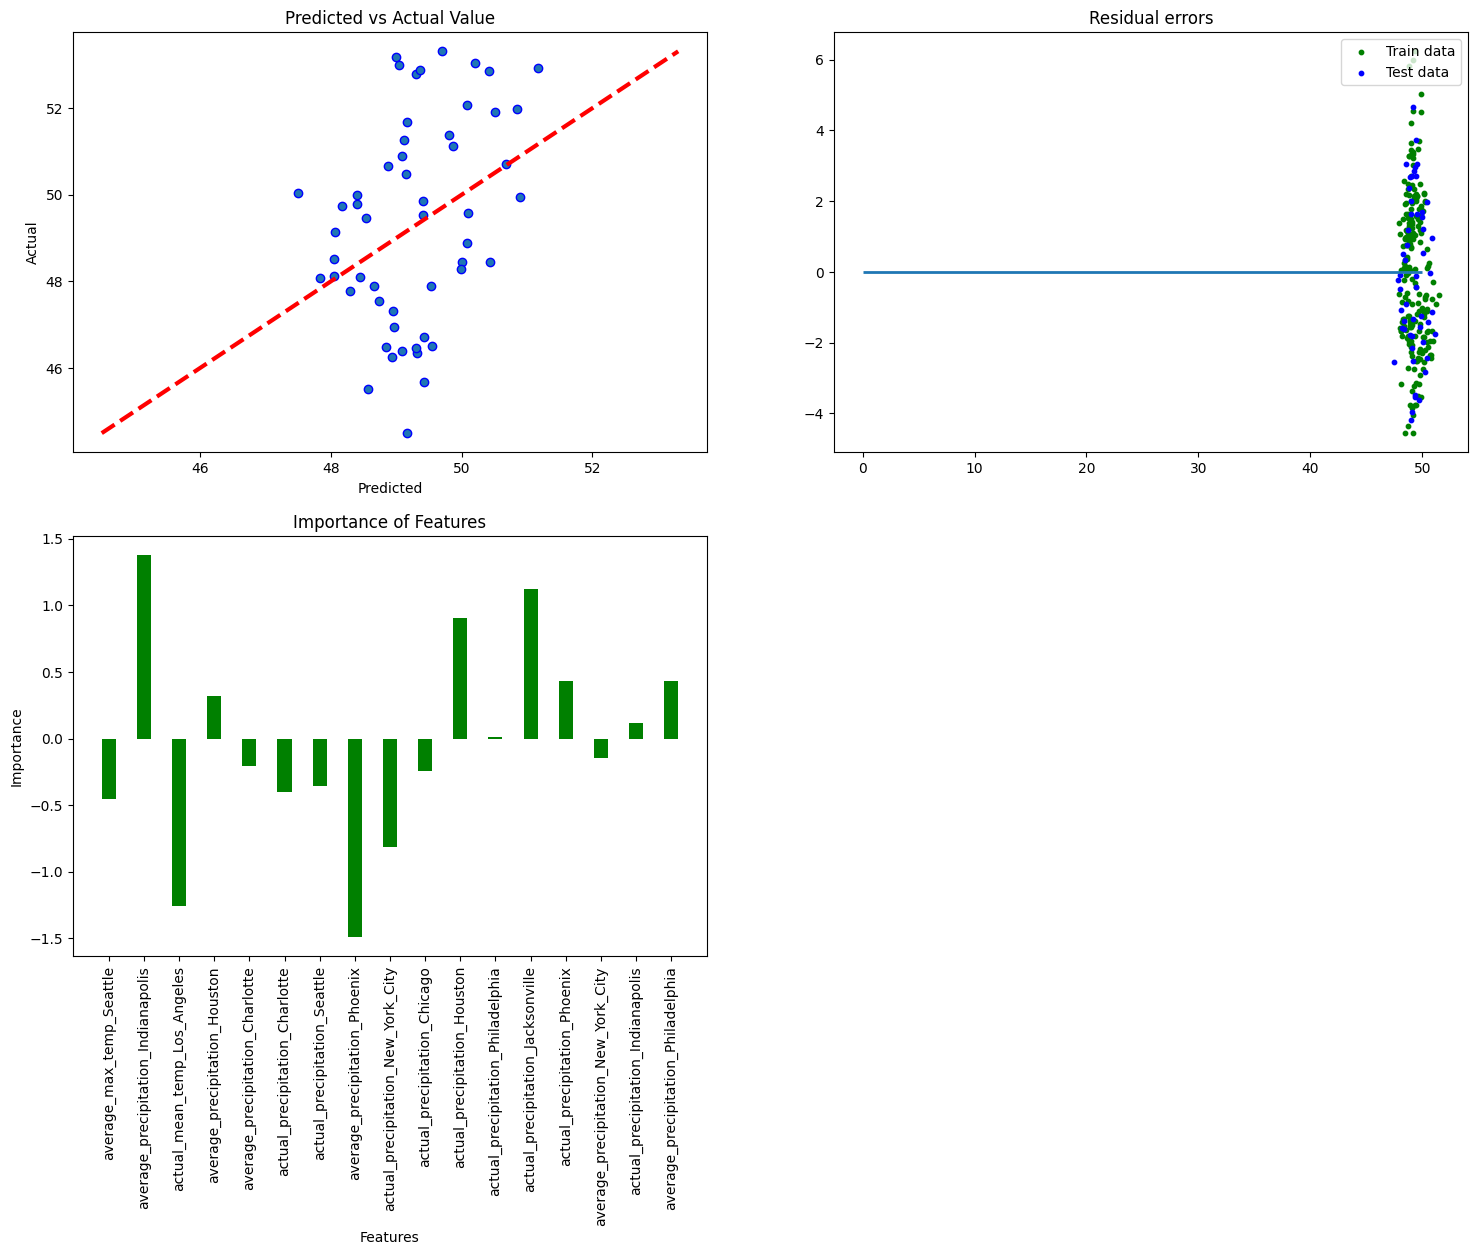

In [ ]:
#models = [Linear_reg, Random_forest, DT_reg, e_net, lasso, ridgeR, Bayreg, xgb_r]
models = [Random_forest, DT_reg, xgb_r,Linear_reg,lasso,e_net,ridgeR, Bayreg]
#model_names = ['Lnear Regression','Random Forest Regressor', 'Decision Tree Regressor', 'Elastic Net Regressor', 'Lasso Regression', 'Ridge Regression', 'Bayesian Ridge Regression', 'XGB Regressor']
model_names = ['Random Forest Regressor', 'Decision Tree Regressor', 'XGB Regressor','Lnear Regression','Lasso Regression','Elastic Net Regressor','Ridge Regression', 'Bayesian Ridge Regression']
i = 0
t = 0
Acc = []
Abs = []
Sqr = []
featureImp = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for modelName in models:
  print(model_names[i])
  print("-"*len(model_names[i]))
  if i>2:
    t = 1
  i = i+1
  trainModel(modelName, Acc, Abs, Sqr,featureImp,t)

# Accuracies of Models

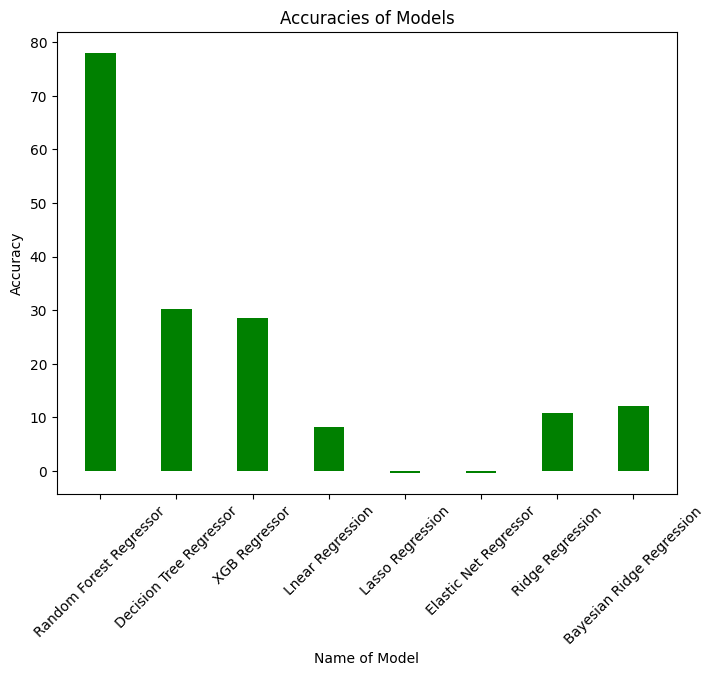

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(model_names, Acc,color='green', width = 0.4)
plt.xlabel("Name of Model")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Accuracies of Models")
plt.show()

# Mean Absolute Error of Models

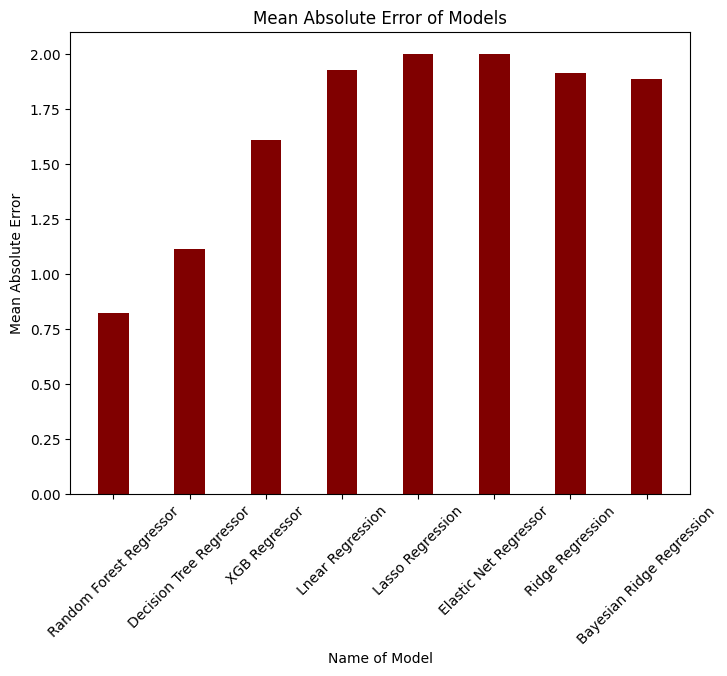

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(model_names, Abs, color ='maroon', width = 0.4)
plt.xlabel("Name of Model")
plt.xticks(rotation=45)
plt.ylabel("Mean Absolute Error")
plt.title("Mean Absolute Error of Models")
plt.show()

# Mean Squared Error of Models

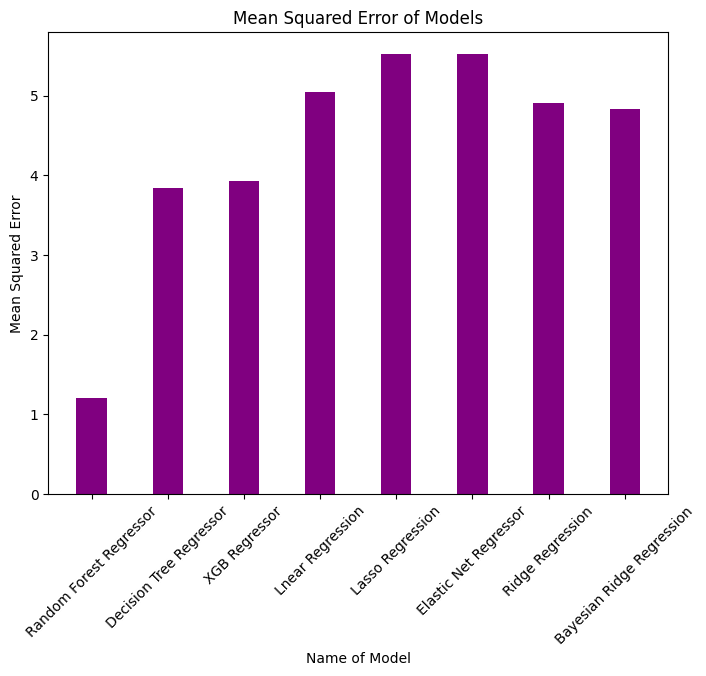

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(model_names, Sqr, color ='purple', width = 0.4)
plt.xlabel("Name of Model")
plt.xticks(rotation=45)
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error of Models")
plt.show()

# Final Results

In [ ]:
ModelTable = pd.DataFrame(
    {'Model Name': model_names,
     'Accuracy': Acc,
     'Mean Absolute Errors': Abs,
     'Mean Square Errors' : Sqr
    })

In [ ]:
print(tabulate(ModelTable, headers = 'keys', tablefmt = 'psql'))

+----+---------------------------+------------+------------------------+----------------------+
|    | Model Name                |   Accuracy |   Mean Absolute Errors |   Mean Square Errors |
|----+---------------------------+------------+------------------------+----------------------|
|  0 | Random Forest Regressor   |   77.9658  |                0.82556 |              1.21222 |
|  1 | Decision Tree Regressor   |   30.1898  |                1.11396 |              3.84065 |
|  2 | XGB Regressor             |   28.6121  |                1.60952 |              3.92745 |
|  3 | Lnear Regression          |    8.21904 |                1.92791 |              5.04939 |
|  4 | Lasso Regression          |   -0.38979 |                2.00021 |              5.52301 |
|  5 | Elastic Net Regressor     |   -0.38979 |                2.00021 |              5.52301 |
|  6 | Ridge Regression          |   10.7523  |                1.91445 |              4.91002 |
|  7 | Bayesian Ridge Regression |   12.

# Line graph to see relationship between most important features and the stock price

In [ ]:
normalized_df=(df-df.min())/(df.max()-df.min())

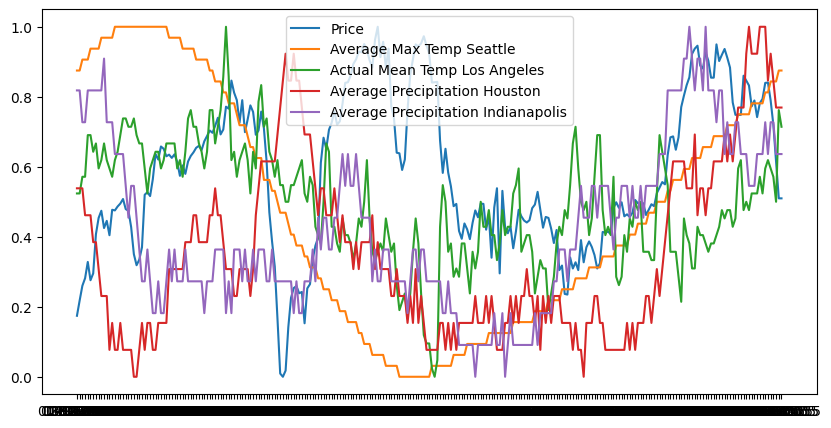

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df.index, normalized_df['Price'], label = "Price")
plt.plot(df.index, normalized_df['average_max_temp_Seattle'], label = "Average Max Temp Seattle")
plt.plot(df.index, normalized_df['actual_mean_temp_Los_Angeles'], label = "Actual Mean Temp Los Angeles")
plt.plot(df.index, normalized_df['average_precipitation_Houston'], label = "Average Precipitation Houston")
plt.plot(df.index, normalized_df['average_precipitation_Indianapolis'], label = "Average Precipitation Indianapolis")
plt.legend()
plt.show()